# Let's discuss supervised learning models: 
# LR, Perceptron, KNN, SVM, forest, decisiontree
# Logistic regression intuition and conditional probabilities
- One of the most widely used algorithms for classification in industry. 
- Similar to the perceptron and Adaline, the logistic regression model is also a linear model for binary classification 
- It can be extended to multiclass classification via the OvR technique.
- In this, activation function = sigmoid a.k.a (1/)

For example, if we compute Logistic regression intuition for a particular flower sample to be 
0.8 then, it means that the chance that this sample is an Iris-Versicolor flower is 80 percent.
Similarly, the probability that this flower is an Iris-Setosa flower is 20 percent.
The predicted probability can then simply be converted into a binary outcome via a quantizer 
(unit step function). Estimating probability like this will be very useful in cases like weather forecasting.

# LogisticRegression cost function
(LogRegression is basically Adaline with below mentioned cost function)

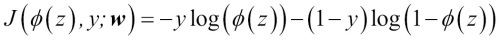

In [6]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/logistic-regression-cost.jpg")

# Tackling overfitting via regularization
- <b>Overfitting:</b>If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. 
- <b>Underfitting:</b>Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.
- <b>Variance:</b>Variance measures the consistency (or variability) of the model prediction for a particular sample instance if we would retrain the model multiple times, for example, on different subsets of the training dataset.
- <b>Bias:</b> Bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets
- <b>Regularization:</b>One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.
    - Filters out noise
    - handles collinearity (similar features)
    - prevents overfitting
    - penalizes extreme weights
    - Standardization is really important for regularization to work
    - For regularization, we need to ensure that all our features are on comparable scales.
    
# LogReg Cost Function with L2:

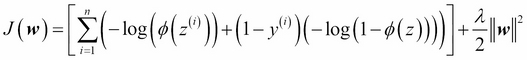

In [7]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/L2.jpg")

# SVM
- can be considered as an extension of the perceptron.
- Using the perceptron algorithm, we minimized misclassification errors.
- However, in SVMs, our optimization objective is to maximize the margin.
- <b>Margin:</b>  is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called <b>support vectors.</b>
- <b> Rationale behin SVM: </b> The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.
- <b> objective function:</b> is to maximize margin a.k.a <b><u>2/Sum(w^2)</u></b>
- In practise, instead of maximizing margin, we minimize its reciprocal a.k.a Sum(w^2)/2 using quadratic programming

# Dealing with the nonlinearly separable case using slack variables
- Another reason why svm is so popular is that it can be easily kernelized to solve nonlinear classification problems.
- The motivation for introducing the slack variable Dealing with the nonlinearly separable case using slack variables was that the linear constraints need to be relaxed for nonlinearly separable data

# Updated cost and activation function's with slack variable

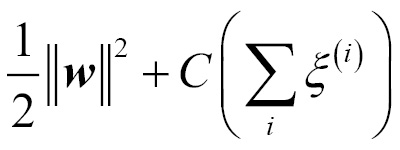

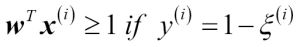

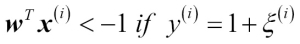

In [8]:
from IPython.display import Image, display
x = Image("/Users/surthi/gitrepos/ml-notes/images/svm-cost-func-with-slack.jpg")
y = Image("/Users/surthi/gitrepos/ml-notes/images/svm-activation-func-with-slack1.jpg")
z = Image("/Users/surthi/gitrepos/ml-notes/images/svm-activation-func-with-slack2.jpg")

display(x,y,z)

# Linear LogReg(LR) vs Linear SVM
- Linear LR and linear SVMs often yield very similar results.
- LR tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs.
- The SVMs mostly care about the points that are closest to the decision boundary (support vectors).
- LR has the advantage that it is a simpler model that can be implemented more easily.
- LR models can be easily updated, which is attractive when working with streaming data.

# Solving nonlinear problems using a kernel SVM
[Apart from introducing slack variable, nonlinearity can be handled via kernel SVM]

<h3> Basic idea behind Kernel:</h3> 
The basic idea behind kernel methods is to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function where it becomes linearly separable.

# Consider following figure that shows how high dimension projection can make nonlinear data linearly separable

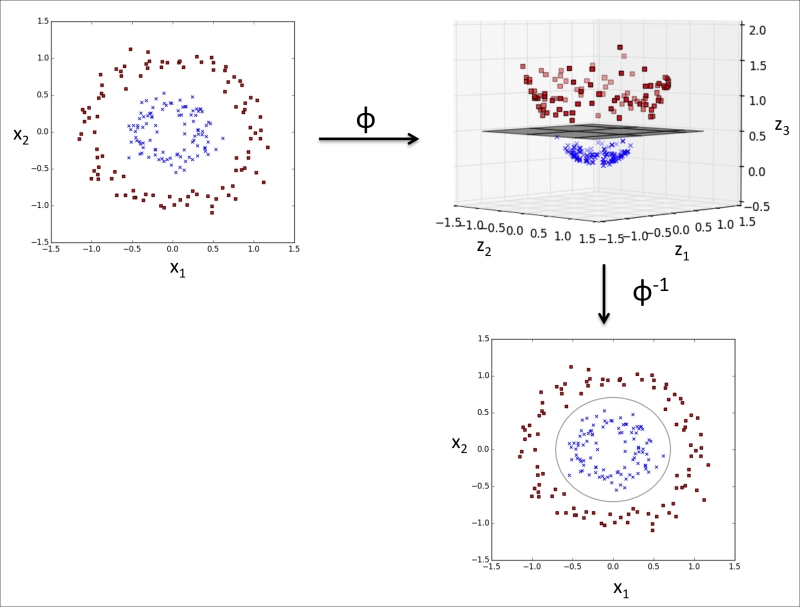

In [9]:
Image("/Users/surthi/gitrepos/ml-notes/images/kernel-high-dimension-mapping.jpg")

<h2>Problem with mapping data onto higher-dimensions:</h2>
- construction of the new features is computationally very expensive

<h2>Solution: Kernel Function</h2>
- In order to save the expensive step of calculating this dot product between two points explicitly, we define a so-called <b>kernel function</b>.

<h2>Check RBF Kernel shown below:</h2>

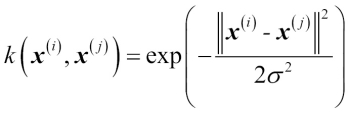

In [10]:
Image("/Users/surthi/gitrepos/ml-notes/images/rbf-kernel.jpg")

# Explaining RBF Kernel shown above:
- Roughly speaking, the term kernel can be interpreted as a similarity function between a pair of samples. 
- The minus sign inverts the distance measure into a similarity score
- Due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very dissimilar samples).

# Decision tree learning
- Using the decision algorithm, we start at the tree root
- Split the data on the feature that results in the largest information gain (IG)
- Iteratively repeat this splitting procedure at each child node until the leaves are pure.
- This means that the samples at each node all belong to the same class.
- In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. 
- Thus, we typically want to prune the tree by setting a limit for the maximal depth of the tree.

# RandomForests
The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization error and is less susceptible to overfitting.
The random forest algorithm can be summarized in four simple steps:

- Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
- Grow a decision tree from the bootstrap sample. At each node:
    - Randomly select d features without replacement.
    - Split the node using the feature that provides the best split according to the objective function, for instance, by maximizing the information gain.
    - Note: choose random subset of features(= sqrt(m) where m=num_features) in each run
- Repeat the steps 1 to 2 k times.
- Aggregate the prediction by each tree to assign the class label by majority vote.

Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost. A big advantage of random forests is that we don't have to worry so much about choosing good hyperparameter values.

# KNN
The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
- Choose the number of k and a distance metric.
- Find the k nearest neighbors of the sample that we want to classify.
- Assign the class label by majority vote.

# Parametric versus nonparametric models

- <b>Parametric models:</b> we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Ex: LR, linear SVM, Perceptron
- <b>NonParametric models:</b> KNN, Kernel SVM, Random Forest 

# The curse of dimensionality

<b>It is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality.</b> The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate.

<u>We have discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.
</u>

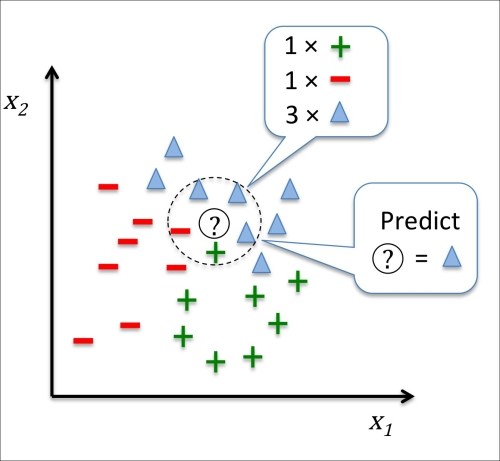

In [11]:
Image("/Users/surthi/gitrepos/ml-notes/images/knn.jpg")

Q&A:
3.3 Logistic regression versus SVM

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs. The SVMs mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage that it is a simpler model that can be implemented more easily. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.

3.3 increasing the value of C increases the bias and lowers the variance of the model.

3.3 why do we need gamma & C (kernel svm)
3.5 with the dabba's tht its learning r random forests or decision trees useful in reality? if so in what cases?

3.5 in models where regularization is not applicable such as decision trees and KNN. why?
- SVM: can we do online training with SVM
- SVM: Nonlinearity - SlackVar vs kernel!?
- does regularization apply only to parameterized models?

